# My Lecture 2

In [1]:
%matplotlib inline

import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

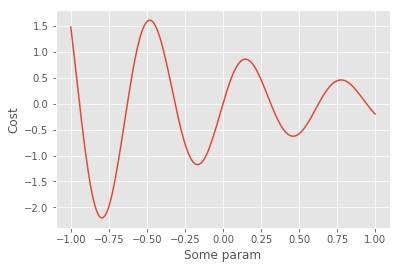

In [2]:
K = 10
x = np.linspace(-1,1,200)
cost = np.sin(K*x) * np.exp(-x)

fig = plt.figure()
ax = fig.gca()


ax.set_ylabel('Cost')
ax.set_xlabel('Some param')
ax.plot(x,cost)

In [3]:
simplified_gradient = np.diff(cost)
print (simplified_gradient)

[-0.24873082 -0.25619419 -0.26092369 -0.26292601 -0.2622352  -0.25891185
 -0.25304186 -0.24473515 -0.23412404 -0.22136147 -0.20661904 -0.19008492
 -0.17196161 -0.15246364 -0.13181511 -0.11024729 -0.08799612 -0.06529976
 -0.04239608 -0.01952035  0.00309714  0.02523329  0.0466743   0.06721764
  0.08667384  0.10486822  0.12164227  0.13685499  0.15038393  0.16212607
  0.17199848  0.17993873  0.18590515  0.18987682  0.19185333  0.19185446
  0.1899195   0.1861065   0.18049131  0.17316648  0.16423992  0.1538336
  0.14208198  0.12913042  0.11513349  0.10025325  0.08465744  0.06851767
  0.05200765  0.03530134  0.01857126  0.00198669 -0.0142879  -0.03009444
 -0.04528275 -0.05971184 -0.07325123 -0.08578198 -0.09719771 -0.10740543
 -0.11632614 -0.12389545 -0.13006386 -0.13479701 -0.13807568 -0.13989574
 -0.14026785 -0.13921706 -0.1367823  -0.13301567 -0.12798169 -0.12175639
 -0.11442628 -0.10608732 -0.09684375 -0.08680684 -0.07609367 -0.0648258
 -0.05312798 -0.04112681 -0.02894944 -0.01672226 -0.0

In [4]:
K = 10
x = np.linspace(-1,1,200)
cost = np.sin(K*x) * np.exp(-x)

In [5]:
n_iterations = 400
learning_rate = 1.0
init_p = np.random.randint(len(x)*0.2, len(x)*0.8)
print(init_p)

145


In [6]:
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

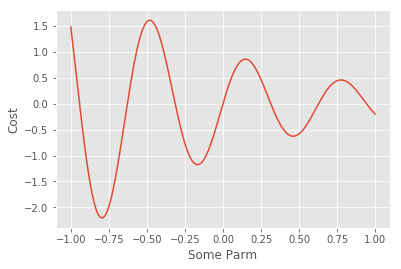

In [7]:
fig = plt.figure()
ax = fig.gca()
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parm')

ax.plot(x,cost)

for i in range(n_iterations):
    init_p -= learning_rate * simplified_gradient[int(init_p)]
    int_init_p = int(init_p)
    ax.plot(x[init_p], cost[init_p], 'ro', alpha=(i+1)/n_iterations)
#     ax.plot(x[int_init_p], cost[int_init_p], 'ro', alpha=(i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

## Let's create a sample function

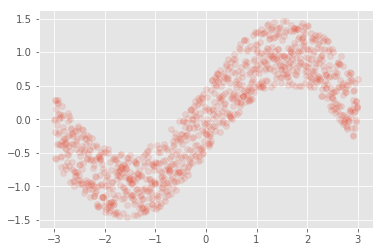

In [9]:
nb_obs = 1000
x = np.linspace(-3,3, nb_obs)
y = np.sin(x) + np.random.uniform(-0.5,0.5, nb_obs)

plt.scatter(x, y, alpha=0.15, marker='o')

In [10]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

(array([  10.,   64.,  118.,  228.,  237.,  176.,  111.,   43.,   11.,    2.]),
 array([-2.66633677, -2.05496387, -1.44359097, -0.83221807, -0.22084517,
         0.39052773,  1.00190063,  1.61327353,  2.22464643,  2.83601933,
         3.44739223]),
 <a list of 10 Patch objects>)

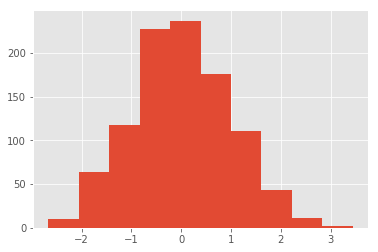

In [15]:
sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

In [16]:
print(n.mean())
print(n.std())

0.0181912
0.990424


In [20]:
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='Weight')
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='Bias')

Y_pred = X * W + B

Let's make sure we know what we're working with

In [32]:
tf.random_normal([1], dtype=tf.float32, stddev=0.1).eval()

array([-0.11247324], dtype=float32)

In [25]:
tf.constant([0], dtype=tf.float32)

<tf.Tensor 'Const_2:0' shape=(1,) dtype=float32>

In [33]:
def distance(a,b):
    return tf.abs(a -b)

In [38]:
cost = tf.reduce_mean(distance(Y_pred, Y))


## Training

In [104]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.619348
0.516182
0.467017
0.442106
0.432391
0.427155
0.424876
0.423465
0.422614
0.4221
0.421816
0.421589
0.421464
0.421433
0.421407
0.421394
0.421382
0.421371


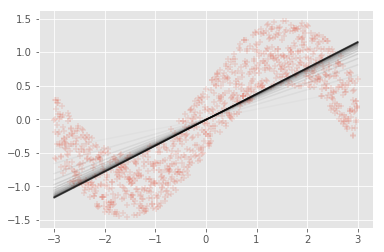

In [56]:
nb_iterations = 500

fig, ax = plt.subplots(1, 1)
ax.scatter(x, y, alpha=0.15, marker='+')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_training_cost = 0.0
    for i in range(nb_iterations):
        
        sess.run(optimizer, feed_dict={X: x, Y: y})
        training_cost = sess.run(cost, feed_dict={X: x, Y: y})
        
        # Plot
        if(i%10 == 0):
            y_pred = Y_pred.eval(feed_dict={X: x}, session=sess)
            ax.plot(x, y_pred, 'k', alpha=i / nb_iterations)
            fig.show()
            plt.draw()
            
            print(training_cost)
            
        # Delta too small?
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        prev_training_cost = training_cost
        

## Let's shuffle

In [102]:
idxs = np.arange(100)
rand_idxs = np.random.permutation(idxs)
batch_size = 10
nb_batches = len(rand_idxs) // batch_size

for b in range(nb_batches):
    print(rand_idxs[b * batch_size : (b + 1) * batch_size])

[44 31  0 45 21 70 78 34 97 90]
[58 16 42 71 54  3 92 33 65 86]
[87 35 95 79 91 88 96 66 52 49]
[41 74 26 39 28 13 48 10 56  8]
[89 72 76 57 11 82 53 59 67 29]
[62 36 73 94 98 12 80 64  2 37]
[24 43 63 75 25 18 17 30  6 27]
[55 20 14 83 81 23 47  7 85 77]
[19  5 50 99 68 46 22 32 93 15]
[ 1  9  4 51 38 60 84 40 69 61]


In [109]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    # plot
    fig, ax = plt.subplots(1, 1)
    ax.scatter(x, y, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])


    nb_iterations = 1000
    batch_size = 1000 # 10
    nb_batches = len(x) // batch_size

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for iter_i in range(nb_iterations):

            # shuffle all data
            idxs = np.random.permutation(range(len(x)))
            for b in range(nb_batches):
                idxs_i = idxs[b * batch_size: (b + 1) * batch_size]
                sess.run(optimizer, feed_dict={X:x[idxs_i], Y:y[idxs_i]})

                if(iter_i%100 == 0):
                    # metrics
                    training_cost = sess.run(cost, feed_dict={X:x, Y:y})
                    print("{} - Iteration {}, Batch {}".format(training_cost, iter_i, b))

                    # and plot
                    y_pred = Y_pred.eval(feed_dict={X: x}, session=sess)
                    ax.plot(x, y_pred, 'k', alpha= iter_i / nb_iterations)
    plt.draw()

## Let's do a hundred neuron linear network

2.9743950366973877 - Iteration 0, Batch 0
1.5867245197296143 - Iteration 100, Batch 0
1.4171372652053833 - Iteration 200, Batch 0
1.3869765996932983 - Iteration 300, Batch 0
1.3876934051513672 - Iteration 400, Batch 0
1.3884096145629883 - Iteration 500, Batch 0
1.389129638671875 - Iteration 600, Batch 0
1.3867615461349487 - Iteration 700, Batch 0
1.3874846696853638 - Iteration 800, Batch 0
1.3882005214691162 - Iteration 900, Batch 0


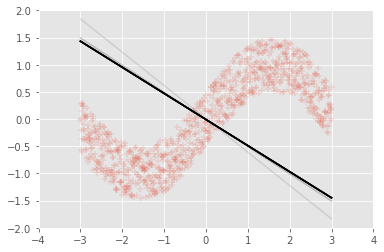

In [114]:
nb_neurons = 100
W = tf.Variable(tf.random_normal([1, nb_neurons], stddev=0.1))
b = tf.Variable(tf.constant([0], dtype=tf.float32, shape=[nb_neurons]))

h = tf.matmul(tf.expand_dims(X,1), W) + b

Y_pred = tf.reduce_sum(h, 1)
train(X, Y, Y_pred)

## Hmm.. How about a polynomial function?

### Degree 2

0.8244473934173584 - Iteration 0, Batch 0
0.42137420177459717 - Iteration 100, Batch 0
0.4213593006134033 - Iteration 200, Batch 0
0.42135941982269287 - Iteration 300, Batch 0
0.4213593006134033 - Iteration 400, Batch 0
0.4213593304157257 - Iteration 500, Batch 0
0.42135924100875854 - Iteration 600, Batch 0
0.42135941982269287 - Iteration 700, Batch 0
0.4213593006134033 - Iteration 800, Batch 0
0.42135941982269287 - Iteration 900, Batch 0


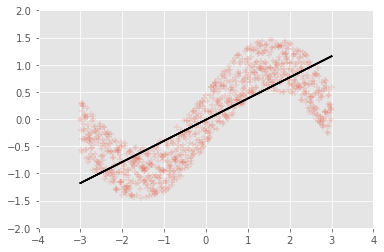

In [121]:
Y_pred = tf.Variable(tf.random_normal([1], name='yolo'))

for pow_i in range(0,2):
    W = tf.Variable(tf.random_normal([1], stddev=0.1), name='Weight_{}'.format(pow_i))
    Y_pred = Y_pred + tf.multiply(tf.pow(X,pow_i), W)

train(X, Y, Y_pred)

### Degree 4

0.7499433755874634 - Iteration 0, Batch 0
0.7040284276008606 - Iteration 100, Batch 0
0.6736212372779846 - Iteration 200, Batch 0
0.6002066135406494 - Iteration 300, Batch 0
0.5350703597068787 - Iteration 400, Batch 0
0.49367374181747437 - Iteration 500, Batch 0
0.46934381127357483 - Iteration 600, Batch 0
0.4561580419540405 - Iteration 700, Batch 0
0.44872838258743286 - Iteration 800, Batch 0
0.4432660639286041 - Iteration 900, Batch 0


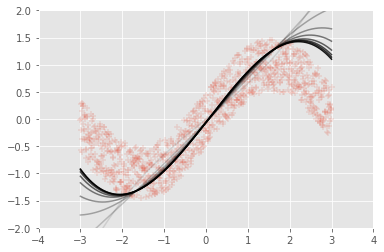

In [118]:
Y_pred = tf.Variable(tf.random_normal([1], name='yolo'))

for pow_i in range(0,4):
    W = tf.Variable(tf.random_normal([1], stddev=0.1), name='Weight_{}'.format(pow_i))
    Y_pred = Y_pred + tf.multiply(tf.pow(X,pow_i), W)

train(X, Y, Y_pred)

### Degree 5

3.297078847885132 - Iteration 0, Batch 0
2.471336841583252 - Iteration 100, Batch 0
2.9697346687316895 - Iteration 200, Batch 0
3.0304057598114014 - Iteration 300, Batch 0
3.1129157543182373 - Iteration 400, Batch 0
3.184908151626587 - Iteration 500, Batch 0
3.2275567054748535 - Iteration 600, Batch 0
3.2369933128356934 - Iteration 700, Batch 0
3.3056459426879883 - Iteration 800, Batch 0
3.3984785079956055 - Iteration 900, Batch 0


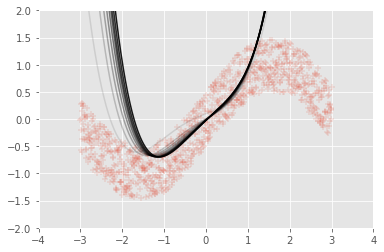

In [119]:
Y_pred = tf.Variable(tf.random_normal([1], name='yolo'))

for pow_i in range(0,5):
    W = tf.Variable(tf.random_normal([1], stddev=0.1), name='Weight_{}'.format(pow_i))
    Y_pred = Y_pred + tf.multiply(tf.pow(X,pow_i), W)

train(X, Y, Y_pred)

### Degree 6

3.3863236904144287 - Iteration 0, Batch 0
4.198070526123047 - Iteration 100, Batch 0
4.174466133117676 - Iteration 200, Batch 0
4.701898574829102 - Iteration 300, Batch 0
5.534776210784912 - Iteration 400, Batch 0
6.294535160064697 - Iteration 500, Batch 0
6.943516731262207 - Iteration 600, Batch 0
7.563996315002441 - Iteration 700, Batch 0
8.258369445800781 - Iteration 800, Batch 0
8.81190013885498 - Iteration 900, Batch 0


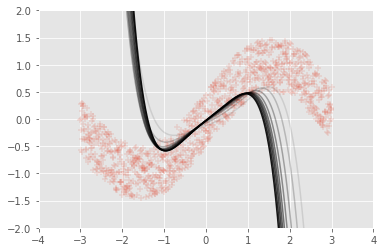

In [120]:
Y_pred = tf.Variable(tf.random_normal([1], name='yolo'))

for pow_i in range(0,6):
    W = tf.Variable(tf.random_normal([1], stddev=0.1), name='Weight_{}'.format(pow_i))
    Y_pred = Y_pred + tf.multiply(tf.pow(X,pow_i), W)

train(X, Y, Y_pred)

## Enter Non Linearity

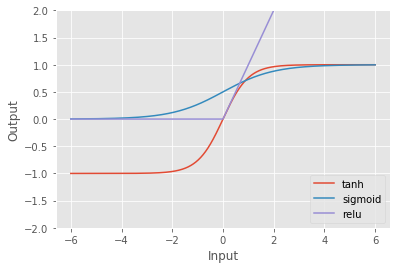

In [124]:
sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)

plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')

plt.legend(loc='lower right')
plt.ylim([-2, 2])

plt.xlabel('Input')
plt.ylabel('Output')

plt.grid('on')

0.4897247850894928 - Iteration 0, Batch 0
0.3265783190727234 - Iteration 100, Batch 0
0.30916765332221985 - Iteration 200, Batch 0
0.30910009145736694 - Iteration 300, Batch 0
0.30904650688171387 - Iteration 400, Batch 0
0.3089941143989563 - Iteration 500, Batch 0
0.30894559621810913 - Iteration 600, Batch 0
0.30889952182769775 - Iteration 700, Batch 0
0.3088517189025879 - Iteration 800, Batch 0
0.3088046908378601 - Iteration 900, Batch 0


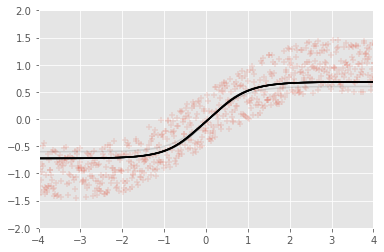

In [131]:
nb_neurons = 10

W = tf.Variable(tf.random_normal([1, nb_neurons]), name='W')
b = tf.Variable(tf.constant([0], dtype=tf.float32, shape=[nb_neurons]), name='b')

# h = tf.nn.relu(tf.matmul(tf.expand_dims(X,1), W) + b, name='h')
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X,1), W) + b, name='h')

Y_pred = tf.reduce_mean(h, 1)

train(X, Y, Y_pred, learning_rate=1)

## Linear function

In [132]:
def linear(X, n_input, n_output):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(
        tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h

 
 ## Graph Operations

In [137]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [138]:
g = tf.get_default_graph()

In [139]:
[op.name for op in tf.get_default_graph().get_operations()]

[]

In [140]:
# New network

X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

In [141]:
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

In [142]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [143]:
ops.reset_default_graph()

In [144]:
[op.name for op in tf.get_default_graph().get_operations()]

[]

In [145]:
# New network with scope
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

### ^ Just noticed that `h` is missing in the above unlike previously

## Deep Neural Network

In [147]:
h2 = linear(h, 10, 10, scope='layer2')
h3 = linear(h2, 10, 3, scope='layer3')

In [148]:
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b/Initializer/Const',
 'layer2/b',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'layer3/W/Initiali

# Image Inpainting

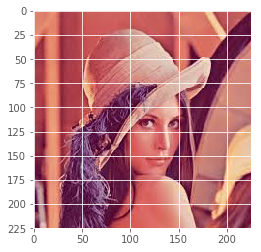

In [187]:
from scipy.misc import imread, imresize

# Of course we'll test it with Lena ;)
comic = imread("/home/may/training/CADL/data/random/lena.jpg")

img = imresize(comic, (64, 64))
plt.imshow(comic)

In [175]:
x = []
y = []

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        x.append([row, col])
        y.append(img[row, col])

x = np.array(x)
y = np.array(y)

x = (x - np.mean(x)) / np.std(x)

print (x.shape, y.shape)

(4096, 2) (4096, 3)


In [176]:
x[0], y[0]

(array([-1.70519568, -1.70519568]), array([221, 131, 115], dtype=uint8))

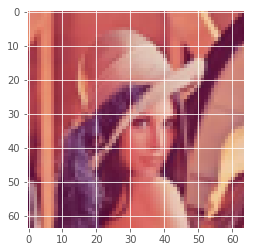

In [177]:
plt.imshow(y.reshape(img.shape))

In [182]:
ops.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

In [183]:
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

In [184]:
cost = tf.reduce_mean(tf.reduce_sum(distance(Y_pred, Y), 1))

In [185]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

0 111.577
1 101.827
2 98.2738
3 97.2691
4 96.0073
5 95.6322
6 95.0858
7 96.0903
8 93.0161
9 92.2003
10 91.2023
11 90.3679
12 91.3667
13 89.7805
14 90.6636
15 88.3368
16 88.319
17 87.042
18 86.7173
19 86.6686


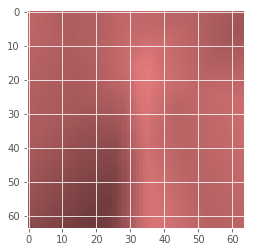

20 85.5042
21 84.8206
22 85.1834
23 83.6024
24 83.504
25 82.4652
26 83.2987
27 80.9617
28 79.8774
29 80.7298
30 79.343
31 85.9548
32 78.2748
33 78.0862
34 80.3325
35 77.5361
36 76.89
37 76.8867
38 76.3116
39 75.9805


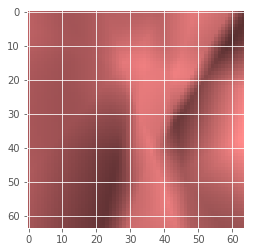

40 76.7933
41 76.3143
42 75.9146
43 75.0001
44 74.2683
45 74.2227
46 74.0422
47 73.3524
48 73.8231
49 76.3204
50 73.601
51 71.3205
52 71.8339
53 73.7546
54 70.9584
55 71.3785
56 72.1492
57 71.1754
58 70.0846
59 72.0365


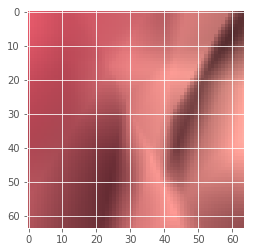

60 72.3389
61 71.3274
62 69.9173
63 69.5839
64 69.0047
65 67.4696
66 66.5516
67 66.653
68 65.6624
69 66.8469
70 66.7412
71 66.3368
72 64.6193
73 63.4375
74 65.1595
75 63.2347
76 64.2028
77 63.3976
78 65.0037
79 63.5421


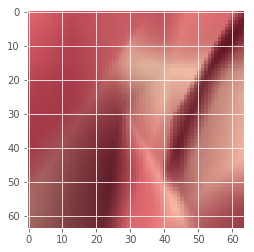

80 63.022
81 63.1185
82 62.0137
83 63.0137
84 61.1052
85 60.6828
86 62.3192
87 68.2603
88 59.3754
89 60.8117
90 59.745
91 60.0226
92 64.3106
93 61.4513
94 58.4968
95 59.6864
96 59.1552
97 60.9375
98 59.4342
99 60.4657


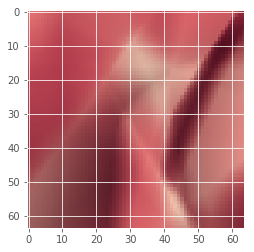

100 57.9037
101 57.692
102 58.5208
103 61.2417
104 59.4817
105 60.782
106 57.7993
107 56.9377
108 58.9241
109 57.3756
110 57.9434
111 65.5176
112 59.8417
113 57.5125
114 57.0313
115 59.709
116 56.3293
117 56.2296
118 57.2053
119 56.2448


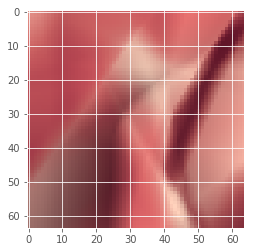

120 56.9691
121 56.064
122 58.8065
123 55.7889
124 54.9779
125 55.6145
126 54.5049
127 55.2867
128 55.961
129 54.813
130 54.9847
131 55.859
132 58.7685
133 54.9856
134 55.0742
135 56.0819
136 56.8243
137 55.8492
138 55.4467
139 53.723


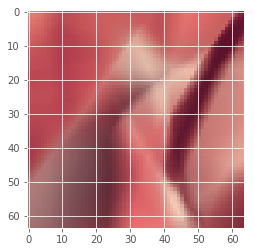

140 53.2001
141 55.2677
142 54.2814
143 52.1344
144 52.4257
145 52.8924
146 57.0499
147 53.2641
148 53.5097
149 55.5998
150 50.7171
151 52.1629
152 53.5873
153 52.192
154 52.725
155 49.2738
156 50.1385
157 49.4577
158 49.4796
159 49.8849


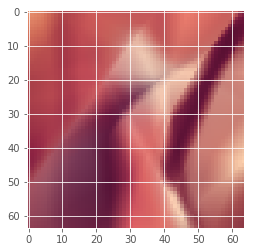

160 49.998
161 53.312
162 49.9856
163 48.6355
164 47.8886
165 51.7068
166 47.6264
167 48.6501
168 47.9588
169 47.5637
170 51.8032
171 51.1491
172 48.3272
173 48.9462
174 46.4642
175 47.9145
176 48.9664
177 54.4006
178 48.1637
179 45.5508


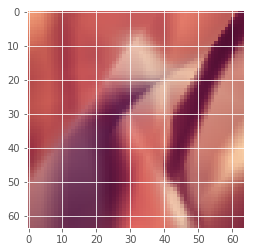

180 45.8766
181 45.233
182 45.5319
183 50.8086
184 44.5265
185 47.3775
186 44.73
187 46.2072
188 46.5106
189 47.7773
190 45.17
191 44.241
192 45.587
193 48.6846
194 43.9513
195 45.1474
196 45.7929
197 43.7499
198 44.4968
199 43.8565


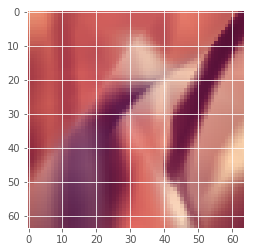

200 44.2955
201 43.5856
202 44.8909
203 43.5917
204 44.9919
205 45.9314
206 44.527
207 44.0812
208 42.9902
209 44.4549
210 43.0321
211 44.863
212 44.5681
213 41.0166
214 41.8099
215 40.5639
216 47.3601
217 41.8013
218 42.9488
219 42.8805


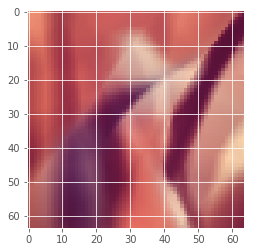

220 42.4603
221 51.2106
222 45.6855
223 42.6936
224 42.2358
225 40.821
226 41.3477
227 43.3834
228 45.1812
229 40.6498
230 42.8475
231 44.9361
232 40.6921
233 41.3488
234 47.8247
235 41.0399
236 45.9277
237 46.0193
238 41.2556
239 44.2387


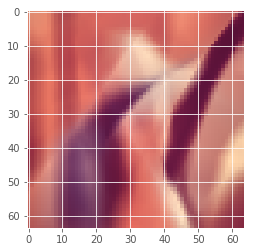

240 41.417
241 41.4684
242 43.1126
243 39.8463
244 43.0869
245 40.5116
246 43.7435
247 42.1801
248 48.3439
249 38.3587
250 42.7459
251 40.7709
252 39.6249
253 39.007
254 37.8607
255 39.7749
256 40.9804
257 38.2276
258 44.3418
259 37.6994


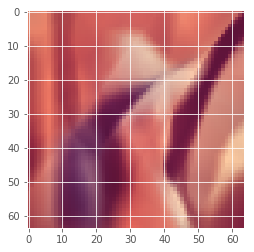

260 39.6973
261 39.3689
262 37.711
263 45.2838
264 37.8635
265 36.7471
266 38.031
267 41.7667
268 42.2375
269 39.752
270 37.8273
271 36.0986
272 38.9589
273 37.296
274 36.8291
275 37.2713
276 35.9375
277 38.5904
278 39.6972
279 41.4753


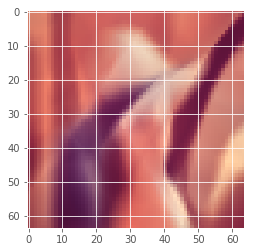

280 42.1362
281 36.8104
282 36.8449
283 39.2176
284 40.547
285 38.4272
286 38.6939
287 39.6388
288 37.3537
289 36.5062
290 38.1533
291 35.13
292 40.1262
293 39.9242
294 36.6208
295 37.0509
296 39.9761
297 35.6684
298 37.8784
299 40.556


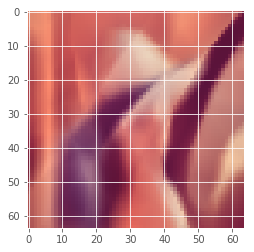

300 33.5095
301 37.281
302 36.6486
303 36.3831
304 33.5269
305 39.7137
306 38.3296
307 35.312
308 34.9547
309 36.1725
310 36.9356
311 36.786
312 35.0455
313 38.0484
314 33.3247
315 36.3728
316 35.3565
317 35.718
318 35.2528
319 35.3811


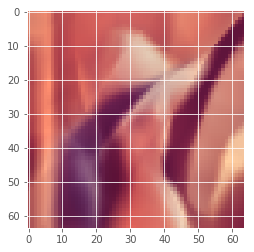

320 36.1224
321 34.6037
322 33.3364
323 34.0079
324 38.2762
325 39.0826
326 34.4235
327 36.6947
328 34.5801
329 32.8363
330 33.1522
331 33.6547
332 34.7636
333 36.3603
334 34.3462
335 34.288
336 37.2949
337 32.4399
338 35.0252
339 32.6883


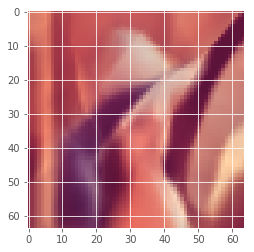

340 33.9285
341 34.3393
342 36.9946
343 33.6767
344 37.6062
345 33.8497
346 35.3317
347 33.9253
348 36.8651
349 32.0189
350 32.7679
351 33.521
352 32.6397
353 35.6985
354 33.1919
355 33.4599
356 33.0207
357 34.4304
358 34.5333
359 35.1813


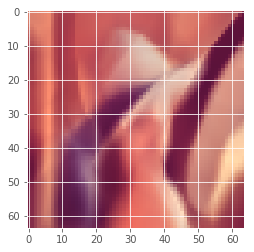

360 32.0307
361 33.0063
362 33.6096
363 34.1288
364 33.8516
365 32.492
366 32.2978
367 37.3077
368 36.6092
369 33.1592
370 30.8842
371 29.959
372 31.2004
373 36.7355
374 35.8167
375 31.6877
376 35.5114
377 32.4587
378 31.8611
379 34.7237


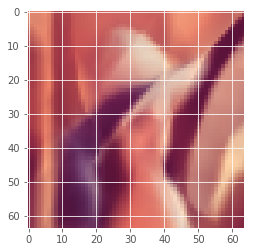

380 31.5353
381 31.9114
382 32.8264
383 35.1095
384 32.3443
385 32.5994
386 33.8462
387 31.4181
388 32.5801
389 35.3016
390 31.9348
391 31.003
392 32.3761
393 31.5533
394 30.9966
395 34.9615
396 33.4259
397 31.5907
398 33.0451
399 34.1571


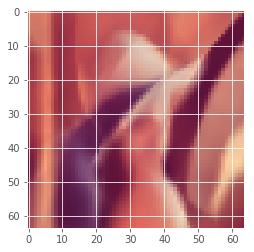

400 33.3184
401 33.4839
402 32.2667
403 29.9272
404 32.3526
405 30.3952
406 35.7624
407 35.5167
408 31.2392
409 38.4262
410 31.0938
411 34.318
412 32.1062
413 31.7788
414 31.3754
415 33.4279
416 34.4874
417 31.5234
418 30.1845
419 34.3442


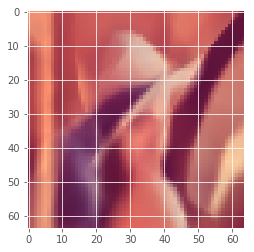

420 35.1239
421 35.0822
422 32.6844
423 31.6185
424 33.264
425 31.9257
426 31.7029
427 31.3571
428 29.8942
429 33.3288
430 31.3708
431 33.0472
432 30.0982
433 31.845
434 29.8904
435 30.3898
436 29.7446
437 30.6542
438 37.4143
439 31.4915


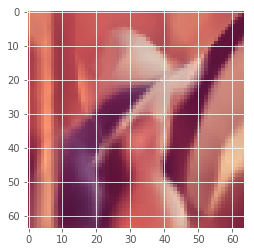

440 30.1774
441 29.1363
442 31.9458
443 36.496
444 32.0415
445 30.6429
446 31.4623
447 29.8917
448 29.642
449 31.7878
450 31.1038
451 32.029
452 30.9618
453 32.9304
454 30.3957
455 28.7586
456 33.3863
457 31.785
458 29.1887
459 29.4754


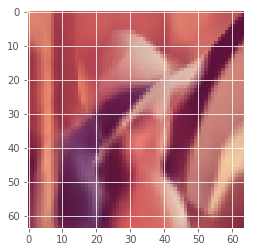

460 30.8294
461 30.7788
462 28.5603
463 29.0552
464 30.7799
465 28.9223
466 31.0789
467 30.2152
468 30.9181
469 29.3248
470 33.5077
471 28.303
472 30.9535
473 30.0333
474 28.7622
475 33.0176
476 30.6295
477 30.3389
478 28.7465
479 29.4239


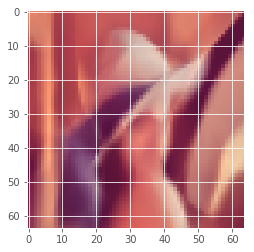

480 35.6467
481 32.0816
482 28.9497
483 30.0894
484 32.0963
485 29.7541
486 30.4891
487 28.9914
488 30.4271
489 30.536
490 28.2761
491 29.8147
492 28.9485
493 27.9951
494 31.2589
495 28.9945
496 29.2956
497 29.2652
498 30.4244
499 30.4048


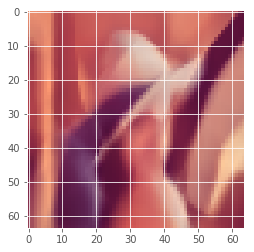

In [186]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(x)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: x[idxs_i], Y: y[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: x, Y: y})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: x}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()